In [1]:
import pandas as pd
import random
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier

# plt.rcParams["figure.figsize"] = (14,4)

from tqdm import tqdm
import time

from datetime import datetime

### Load Data

In [2]:
# main data

# Korea
kospi = pd.read_csv('./data/main_index/kospi(1990.01.02-2023.03.15).csv', sep='|', thousands = ',')
kospi = kospi[['Date','Close']]
kosdaq = pd.read_csv('./data/main_index/kosdaq(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
kosdaq = kosdaq[['Date','Close']]

# US
dow = pd.read_csv('./data/main_index/dow(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
dow = dow[['Date','Close']]
sp500 = pd.read_csv('./data/main_index/sp500(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
sp500 = sp500[['Date','Close']]
russel2000 = pd.read_csv('./data/main_index/russel2000(2001.01.03-2023.03.15).csv', sep='|', thousands = ',')
russel2000 = russel2000[['Date','Close']]
nasdaq = pd.read_csv('./data/main_index/nasdaq(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
nasdaq = nasdaq[['Date','Close']]
ftse = pd.read_csv('./data/main_index/FTSE(2004.03.05-2023.03.15).csv', sep='|', thousands = ',')
ftse = ftse[['Date','Close']]

# Japan
nikkie = pd.read_csv('./data/main_index/nikkie(2001.01.05-2023.03.15).csv', sep='|', thousands = ',')
nikkie = nikkie[['Date','Close']]

# China
ssec = pd.read_csv('./data/main_index/SSEC(1990.12.20-2023.03.15).csv', sep='|', thousands = ',')
ssec = ssec[['Date','Close']]
szse = pd.read_csv('./data/main_index/SZSE(1995.1.24-2023.03.15).csv', sep='|', thousands = ',')
szse = szse[['Date','Close']]
hsi = pd.read_csv('./data/main_index/hsi(2000.12.05-2023.03.15).csv', sep='|', thousands = ',')
hsi = hsi[['Date','Close']]

In [3]:
# bond_yield data

chi_bond_yield_1 = pd.read_csv('./data/bond_yield/china_1year_bond_yield(2002.06.04-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_1 = chi_bond_yield_1[['Date', 'Close']]
chi_bond_yield_3 = pd.read_csv('./data/bond_yield/china_3year_bond_yield(2000.09.22-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_3 = chi_bond_yield_3[['Date', 'Close']]
chi_bond_yield_5 = pd.read_csv('./data/bond_yield/china_5year_bond_yield(2001.03.14-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_5 = chi_bond_yield_5[['Date', 'Close']]
chi_bond_yield_10 = pd.read_csv('./data/bond_yield/china_10year_bond_yield(2002.06.06-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_10 = chi_bond_yield_10[['Date', 'Close']]

jap_bond_yield_1 = pd.read_csv('./data/bond_yield/japan_1year_bond_yield(2006.07.19-2023.03.15).csv', sep='|', thousands = ',')
jap_bond_yield_1 = jap_bond_yield_1[['Date', 'Close']]
jap_bond_yield_3 = pd.read_csv('./data/bond_yield/japan_3year_bond_yield(2006.07.19-2023.03.15).csv', sep='\t', thousands = ',')
jap_bond_yield_3 = jap_bond_yield_3[['Date', 'Close']]
jap_bond_yield_5 = pd.read_csv('./data/bond_yield/japan_5year_bond_yield(2006.07.27-2023.03.15).csv', sep='\t', thousands = ',')
jap_bond_yield_5 = jap_bond_yield_5[['Date', 'Close']]
jap_bond_yield_10 = pd.read_csv('./data/bond_yield/japan_10year_bond_yield(2006.07.19-2023.03.15).csv', sep='\t', thousands = ',')
jap_bond_yield_10 = jap_bond_yield_10[['Date', 'Close']]

kor_bond_yield_1 = pd.read_csv('./data/bond_yield/korea_1year_bond_yield(1995.05.03-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_1 = kor_bond_yield_1[['Date', 'Close']]
kor_bond_yield_3 = pd.read_csv('./data/bond_yield/korea_3year_bond_yield(1995.05.03-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_3 = kor_bond_yield_3[['Date', 'Close']]
kor_bond_yield_5 = pd.read_csv('./data/bond_yield/korea_5year_bond_yield(1995.05.03-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_5 = kor_bond_yield_5[['Date', 'Close']]
kor_bond_yield_10 = pd.read_csv('./data/bond_yield/korea_10year_bond_yield(2000.10.26-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_10 = kor_bond_yield_10[['Date', 'Close']]

us_bond_yield_1 = pd.read_csv('./data/bond_yield/us_1year_bond_yield(2008.06.05-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_1 = us_bond_yield_1[['Date', 'Close']]
us_bond_yield_3 = pd.read_csv('./data/bond_yield/us_3year_bond_yield(1990.01.08-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_3 = us_bond_yield_3[['Date', 'Close']]
us_bond_yield_5 = pd.read_csv('./data/bond_yield/us_5year_bond_yield(1990.01.08-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_5 = us_bond_yield_5[['Date', 'Close']]
us_bond_yield_10 = pd.read_csv('./data/bond_yield/us_10year_bond_yield(1990.01.08-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_10 = us_bond_yield_10[['Date', 'Close']]

In [4]:
# cpi data
'''
chi_cpi_m = pd.read_csv('./data/cpi/china_cpi_compare_last_month(1996.01-2023.02).csv', sep='|', thousands = ',')
chi_cpi_y = pd.read_csv('./data/cpi/china_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')

jap_c_cpi_y = pd.read_csv('./data/cpi/japan_core_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')
jap_cpi_y = pd.read_csv('./data/cpi/japan_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')

kor_cpi_m = pd.read_csv('./data/cpi/korea_cpi_compare_last_month(1990.01-2023.02).csv', sep='|', thousands = ',')
kor_cpi_y = pd.read_csv('./data/cpi/korea_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')

us_c_cpi_m = pd.read_csv('./data/cpi/us_core_cpi_compare_last_month(1990.01-2023.02).csv', sep='|', thousands = ',')
us_c_cpi_y = pd.read_csv('./data/cpi/us_core_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')
us_cpi_m = pd.read_csv('./data/cpi/us_cpi_compare_last_month(1990.01-2023.02).csv', sep='|', thousands = ',')
us_cpi_y = pd.read_csv('./data/cpi/us_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')
'''

chi_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/chi_cpi_m_data_extract.csv', sep='|', thousands = ',')
chi_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/chi_cpi_y_data_extract.csv', sep='|', thousands = ',')

jap_c_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/jap_c_cpi_y_data_extract.csv', sep='|', thousands = ',')
jap_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/jap_cpi_y_data_extract.csv', sep='|', thousands = ',')

kor_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_cpi_m_data_extract.csv', sep='|', thousands = ',')
kor_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_cpi_y_data_extract.csv', sep='|', thousands = ',')

us_c_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_c_cpi_m_data_extract.csv', sep='|', thousands = ',')
us_c_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_c_cpi_y_data_extract.csv', sep='|', thousands = ',')
us_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_cpi_m_data_extract.csv', sep='|', thousands = ',')
us_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_cpi_y_data_extract.csv', sep='|', thousands = ',')

In [5]:
# oil + dollar + gold + unemployment + usd_krw + vix

brent = pd.read_csv('./data/oil/brent(1990.01.02-2023.03.15).csv', sep='|', thousands = ',')
brent = brent[['Date', 'Close']]
dubai = pd.read_csv('./data/oil/dubai(2014.04.28-2023.03.15).csv', sep='|', thousands = ',')
dubai = dubai[['Date', 'Close']]
wti = pd.read_csv('./data/oil/wti(1990.01.02-2023.03.15).csv', sep='|', thousands = ',')
wti = wti[['Date', 'Close']]

bitcoin = pd.read_csv('./data/other/bitcoin(2010.07.18-2023.03.15).csv', sep='|', thousands = ',')
bitcoin = bitcoin[['Date', 'Close']]

dollar = pd.read_csv('./data/other/dollar_index(1990.01.01-2023.03.15).csv', sep='|', thousands = ',')
dollar = dollar[['Date', 'Close']]
gold = pd.read_csv('./data/other/gold_index(1990.01.02-2023.03.15).csv', sep='\t', thousands = ',')
gold = gold[['Date', 'Close']]

# kor_unem = pd.read_csv('./data/other/kor_unemployment_rate(1999.06-2023.03).csv', sep='|', thousands = ',')
# kor_unem = kor_unem[['Date', 'Value']]
# kor_unem.rename(columns = {'Value':'Close'}, inplace=True)
# kor_interest = pd.read_csv('./data/other/kor_interest(1999.05-2023.03).csv', sep='|', thousands = ',')
# kor_interest = kor_interest[['Date', 'Value']]
# kor_interest.rename(columns = {'Value':'Close'}, inplace=True)
# ja_unem = pd.read_csv('./data/other/japan_unemployment_rate(1999.09-2023.02)_날짜수정.csv', sep='|')
# us_unem = pd.read_csv('./data/other/us_unemployment_rate(1990.01-2023.03).csv', sep='|', thousands = ',')
# us_unem = us_unem[['Date', 'Value']]
# us_unem.rename(columns = {'Value':'Close'}, inplace=True)

us_unem = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_unem_data_extract.csv', sep='|', thousands = ',')
kor_unem = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_unem_data_extract.csv', sep='|', thousands = ',')
kor_interest = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_interest_data_extract.csv', sep='|', thousands = ',')

usd_krw = pd.read_csv('./data/other/USD_KRW(1990.01-2023.03.15).csv', sep='|', thousands = ',')
usd_krw = usd_krw[['Date', 'Close']]

vix = pd.read_csv('./data/other/vix(1990.01.03-2023.03.15).csv', sep='|', thousands = ',')
vix = vix[['Date', 'Close']]

### Data Preprocessing

In [6]:
kospi.rename(columns = lambda x : 'kospi_' + x if x != 'Date' else x, inplace = True)
kosdaq.rename(columns = lambda x : 'kosdaq_' + x if x != 'Date' else x, inplace = True)
dow.rename(columns = lambda x : 'dow_' + x if x != 'Date' else x, inplace = True)
sp500.rename(columns = lambda x : 'sp500_' + x if x != 'Date' else x, inplace = True)
russel2000.rename(columns = lambda x : 'russel2000_' + x if x != 'Date' else x, inplace = True)
nasdaq.rename(columns = lambda x : 'nasdaq_' + x if x != 'Date' else x, inplace = True)
ftse.rename(columns = lambda x : 'ftse_' + x if x != 'Date' else x, inplace = True)
ftse.dropna(inplace=True)
nikkie.rename(columns = lambda x : 'nikkie_' + x if x != 'Date' else x, inplace = True)
nikkie.dropna(inplace=True)
ssec.rename(columns = lambda x : 'ssec_' + x if x != 'Date' else x, inplace = True)
szse.rename(columns = lambda x : 'szse_' + x if x != 'Date' else x, inplace = True)
hsi.rename(columns = lambda x : 'hsi_' + x if x != 'Date' else x, inplace = True)
hsi.dropna(inplace=True)

chi_bond_yield_1.rename(columns = lambda x : 'chi_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_3.rename(columns = lambda x : 'chi_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_5.rename(columns = lambda x : 'chi_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_10.rename(columns = lambda x : 'chi_bond_yield_10_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_10.dropna(inplace=True)

jap_bond_yield_1.rename(columns = lambda x : 'jap_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
jap_bond_yield_3.rename(columns = lambda x : 'jap_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
jap_bond_yield_5.rename(columns = lambda x : 'jap_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
jap_bond_yield_10.rename(columns = lambda x : 'jap_bond_yield_10_' + x if x != 'Date' else x, inplace = True)

kor_bond_yield_1.rename(columns = lambda x : 'kor_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
kor_bond_yield_3.rename(columns = lambda x : 'kor_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
kor_bond_yield_5.rename(columns = lambda x : 'kor_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
kor_bond_yield_10.rename(columns = lambda x : 'kor_bond_yield_10_' + x if x != 'Date' else x, inplace = True)

us_bond_yield_1.rename(columns = lambda x : 'us_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
us_bond_yield_3.rename(columns = lambda x : 'us_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
us_bond_yield_5.rename(columns = lambda x : 'us_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
us_bond_yield_5.dropna(inplace=True)
us_bond_yield_10.rename(columns = lambda x : 'us_bond_yield_10_' + x if x != 'Date' else x, inplace = True)

chi_cpi_m.rename(columns = lambda x : 'chi_cpi_m_' + x if x != 'Date' else x, inplace = True)
chi_cpi_y.rename(columns = lambda x : 'chi_cpi_y_' + x if x != 'Date' else x, inplace = True)
jap_c_cpi_y.rename(columns = lambda x : 'jap_c_cpi_y_' + x if x != 'Date' else x, inplace = True)
jap_cpi_y.rename(columns = lambda x : 'jap_cpi_y_' + x if x != 'Date' else x, inplace = True)
kor_cpi_m.rename(columns = lambda x : 'kor_cpi_m_' + x if x != 'Date' else x, inplace = True)
kor_cpi_y.rename(columns = lambda x : 'kor_cpi_y_' + x if x != 'Date' else x, inplace = True)
us_c_cpi_m.rename(columns = lambda x : 'us_c_cpi_m_' + x if x != 'Date' else x, inplace = True)
us_c_cpi_y.rename(columns = lambda x : 'us_c_cpi_y_' + x if x != 'Date' else x, inplace = True)
us_cpi_m.rename(columns = lambda x : 'us_cpi_m_' + x if x != 'Date' else x, inplace = True)
us_cpi_y.rename(columns = lambda x : 'us_cpi_y_' + x if x != 'Date' else x, inplace = True)

brent.rename(columns = lambda x : 'brent_' + x if x != 'Date' else x, inplace = True)
dubai.rename(columns = lambda x : 'dubai_' + x if x != 'Date' else x, inplace = True)
wti.rename(columns = lambda x : 'wti_' + x if x != 'Date' else x, inplace = True)

bitcoin.rename(columns = lambda x : 'bitcoin_' + x if x != 'Date' else x, inplace = True)
dollar.rename(columns = lambda x : 'dollar_' + x if x != 'Date' else x, inplace = True)
gold.rename(columns = lambda x : 'gold_' + x if x != 'Date' else x, inplace = True)
kor_unem.rename(columns = lambda x : 'kor_unem_' + x if x != 'Date' else x, inplace = True)
us_unem.rename(columns = lambda x : 'us_unem_' + x if x != 'Date' else x, inplace = True)
kor_interest.rename(columns = lambda x : 'kor_interest_' + x if x != 'Date' else x, inplace = True)
usd_krw.rename(columns = lambda x : 'usd_krw_' + x if x != 'Date' else x, inplace = True)
vix.rename(columns = lambda x : 'vix_' + x if x != 'Date' else x, inplace = True)


In [7]:
variables = [kospi, kosdaq, dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi, 
             chi_bond_yield_1, chi_bond_yield_3, chi_bond_yield_5, chi_bond_yield_10,
             jap_bond_yield_1, jap_bond_yield_3, jap_bond_yield_5, jap_bond_yield_10,
             kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, kor_unem,
             us_bond_yield_1, us_bond_yield_3, us_bond_yield_5, us_bond_yield_10,
             chi_cpi_m, chi_cpi_y, jap_c_cpi_y, jap_cpi_y, kor_cpi_m, kor_cpi_y, kor_interest,
             us_c_cpi_m, us_c_cpi_y, us_cpi_m, us_cpi_y, brent, dubai, wti,
             dollar, gold, us_unem, usd_krw, vix, bitcoin]
len(variables)

48

In [ ]:
'''
# 월별 데이터

month_data = [kor_unem, chi_cpi_m, chi_cpi_y, jap_c_cpi_y, jap_cpi_y, kor_cpi_m, 
              kor_cpi_y, kor_interest, us_c_cpi_m, us_c_cpi_y, us_cpi_m, us_cpi_y, us_unem]


# 월별 데이터 날짜 늘리기

def fill(df):
    for j in tqdm(range(len(df))):
        for i in range(2, 10):
            df = df.append({'Date' : df.Date[j][:7] + '-0' + str(i), 'Close' : np.nan}, ignore_index=True)
    
    df.sort_values(by ='Date', axis=0, inplace=True)
    df.fillna(method='ffill', inplace=True)
#             df.reset_index(inplace=True)
    return df
'''

In [ ]:
'''
korea = [kospi, kosdaq, 
         kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, kor_unem,
         kor_cpi_m, kor_cpi_y, kor_interest, usd_krw]

usa = [dow, sp500, russel2000, nasdaq, ftse, 
       us_bond_yield_1, us_bond_yield_3, us_bond_yield_5, us_bond_yield_10,
       us_c_cpi_m, us_c_cpi_y, us_cpi_m, us_cpi_y,
       dollar, us_unem, vix]

china = [ssec, szse, hsi, 
         chi_bond_yield_1, chi_bond_yield_3, chi_bond_yield_5, chi_bond_yield_10, chi_cpi_m, chi_cpi_y]

japan = [nikkie, 
         jap_bond_yield_1, jap_bond_yield_3, jap_bond_yield_5, jap_bond_yield_10, jap_c_cpi_y, jap_cpi_y]

oil = [wti, dubai, brent]
#          gold, bitcoin]
'''

# EDA

### Data Correlation

https://m.boostcourse.org/ds112/lecture/60085

https://youngwonhan-family.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84correlation-%EB%B6%84%EC%84%9D-Heatmap-with-Matplotlib-seaborn

In [16]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [8]:
def concat_data(lst, standard_value):
#     # 최소 기간 data 추출
#     df_min_len = len(lst[0])
#     for _ in range(len(lst)):
#         if df_min_len >= len(lst[_]):
#             df_min_len = len(lst[_])
#             df_min = lst[_]
#     x = df_min

    res = standard_value
    for i in lst:
        if standard_value.columns[1] != i.columns[1]:
            df = pd.merge(i, res, how = 'right', left_on = 'Date', right_on = 'Date')
            df.fillna(method = 'ffill', inplace = True)
            df.fillna(method = 'bfill', inplace = True)
            res = df
            
    df = df.set_index('Date')
    return df

In [9]:
all_data = concat_data(variables, kospi)

In [10]:
all_data

,bitcoin_Close,vix_Close,usd_krw_Close,us_unem_Close,gold_Close,dollar_Close,wti_Close,dubai_Close,brent_Close,us_cpi_y_Close,...,szse_Close,ssec_Close,nikkie_Close,ftse_Close,nasdaq_Close,russel2000_Close,sp500_Close,dow_Close,kosdaq_Close,kospi_Close
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-03,0.1,18.19,683.50,0.054,398.7,95.220,23.68,104.00,21.69,0.052,...,1151.58,104.39,13867.61,5562.52,460.90,484.39,358.80,2809.73,557.00,908.59
1990-01-04,0.1,19.22,684.20,0.054,403.2,93.160,23.41,104.00,21.51,0.052,...,1151.58,104.39,13867.61,5562.52,459.39,484.39,355.70,2796.08,557.00,928.82
1990-01-05,0.1,20.11,683.70,0.054,410.9,93.620,23.08,104.00,22.00,0.052,...,1151.58,104.39,13867.61,5562.52,458.22,484.39,352.20,2773.25,557.00,915.11
1990-01-06,0.1,20.11,683.70,0.054,410.9,93.620,23.08,104.00,22.00,0.052,...,1151.58,104.39,13867.61,5562.52,458.22,484.39,352.20,2773.25,557.00,912.86
1990-01-08,0.1,20.26,683.60,0.054,407.2,92.800,21.62,104.00,20.52,0.052,...,1151.58,104.39,13867.61,5562.52,458.71,484.39,353.80,2794.37,557.00,919.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,20361.8,22.61,1325.51,0.035,1834.6,105.305,75.72,81.24,81.59,0.060,...,11579.99,3276.09,28623.15,13118.81,11338.36,1826.59,3918.32,32256.05,809.22,2419.09
2023-03-10,20156.7,24.80,1320.24,0.035,1867.2,104.552,76.68,82.16,82.78,0.060,...,11442.54,3230.08,28143.97,12965.40,11138.89,1772.70,3861.59,31909.96,788.60,2394.59
2023-03-13,24114.4,26.52,1296.58,0.035,1916.5,103.713,74.80,81.01,80.77,0.060,...,11505.02,3268.70,27832.96,13079.91,11188.84,1744.30,3855.76,31819.05,788.89,2410.60


min_max

In [17]:
def concat_data_scaling(lst, standard_value):
#     # 최소 기간 data 추출
#     df_min_len = len(lst[0])
#     for _ in range(len(lst)):
#         if df_min_len >= len(lst[_]):
#             df_min_len = len(lst[_])
#             df_min = lst[_]
#     x = df_min

    res = standard_value
    for i in lst:
        if standard_value.columns[1] != i.columns[1]:
            df = pd.merge(i, res, how = 'right', left_on = 'Date', right_on = 'Date')
            df.fillna(method = 'ffill', inplace = True)
            df.fillna(method = 'bfill', inplace = True)
            res = df
            
    df = df.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(df.values)
    df = pd.DataFrame(data = minmax_scaled, columns = df.columns, index = df.index)
    
    return df

In [18]:
all_data_scaling = concat_data_scaling(variables, kospi)

In [ ]:
all_data_scaling

In [ ]:
df_corr = all_data_scaling.corr()

In [ ]:
# series 이므로 df로 변환한다

s = df_corr.kospi_Close

# 0.7 이상 추출
cor_vis = pd.DataFrame(s[s > 0.7].sort_values(ascending=False))#, columns=['corr'])
f = {'kospi_Close':'{:.2f}'} #column col A to 2 decimals
cor_vis.style.format(f).bar(cmap='Wistia', vmax = 1, vmin = 0.5)
# cor_vis

In [ ]:
# -0.7 이상 추출

cor_vis2 = pd.DataFrame(s[s < -0.7].sort_values(ascending=True))
f = {'kospi_Close':'{:.2f}'} #column col A to 2 decimals
cor_vis2.style.format(f).bar(cmap='Wistia', vmax = -0.5, vmin = -1)

### Correlation over 0.7

In [ ]:

cor_over_70 = [dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi, jap_bond_yield_10, 
               kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, kor_interest, 
               us_bond_yield_3, us_bond_yield_5, us_bond_yield_10, brent, wti, bitcoin, gold]

'''
dow                  90.01.02 
sp500                90.01.02 
russel2000               01.01.03 
nasdaq               90.01.02 
ftse                     04.03.05
nikkie                   01.01.05 
ssec                   90.12.20 
szse                   95.01.24 
hsi                      00.12.05 
jap_bond_yield_10        06.02.07
kor_bond_yield_1       95.05.03
kor_bond_yield_3       95.05.03
kor_bond_yield_5       95.05.03
kor_bond_yield_10        00.10.26
kor_interest         99.05
us_bond_yield_3      90.01.08
us_bond_yield_5      90.01.08
us_bond_yield_10     90.01.08
brent                90.01.02
wti                  90.01.02
# bitcoin                  10.07.18
gold                 90.01.02

'''

In [ ]:
# 날짜 다른 두 컬럼 간 상관관계 및 그래프 도출

def get_corr(lst, standard_value, start, end):
    for i in lst:
        if str(i) != str(standard_value):
            oneone = pd.merge(i, standard_value, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone = oneone.set_index('Date')
            oneone.fillna(method = 'ffill', inplace = True)
            oneone.fillna(method = 'bfill', inplace = True)
            minmax_scaled = minmax_scaler.fit_transform(oneone.values)
            df = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
            print(df)
            print(df.corr())

            df.plot(figsize=(10,5))
            plt.title(f'{standard_value.columns[1]}_{i.columns[1]}')
            plt.show()
            print('🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟')
            print('\n')


In [44]:
def get_plot(df, x, y, start, end):
#     df.set_index(inplace=True)
    df = df[(df.index >= start) & (df.index <= end)]
    df = df[[x, y]]
    df.plot(figsize=(10,5))
    plt.title(f'{x}_{y}')
#     plt.xticks(df['Date'])
    plt.show()
    print('🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟')
    print('\n')

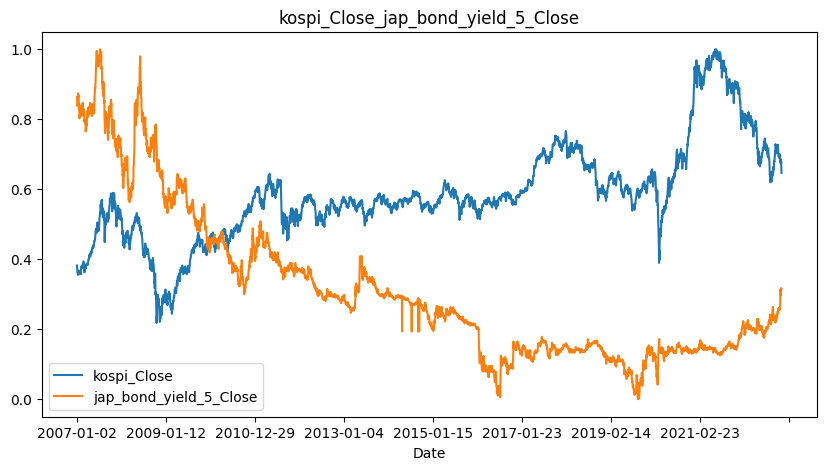

🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟




In [45]:
get_plot(all_data_scaling, 'kospi_Close', 'jap_bond_yield_5_Close', '2007', '2023')

In [ ]:
get_plot(all_data_scaling, 'kospi_Close', 'hsi_Close', '2005', '2012')

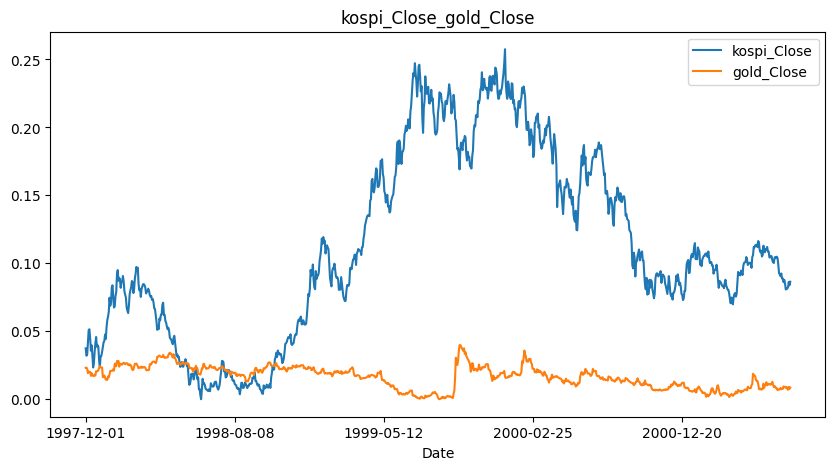

🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟




In [26]:
get_plot(all_data_scaling, 'kospi_Close', 'gold_Close', '1997-12', '2001-08')

In [ ]:
get_plot(all_data_scaling, 'kospi_Close', 'gold_Close', '2019', '2023')

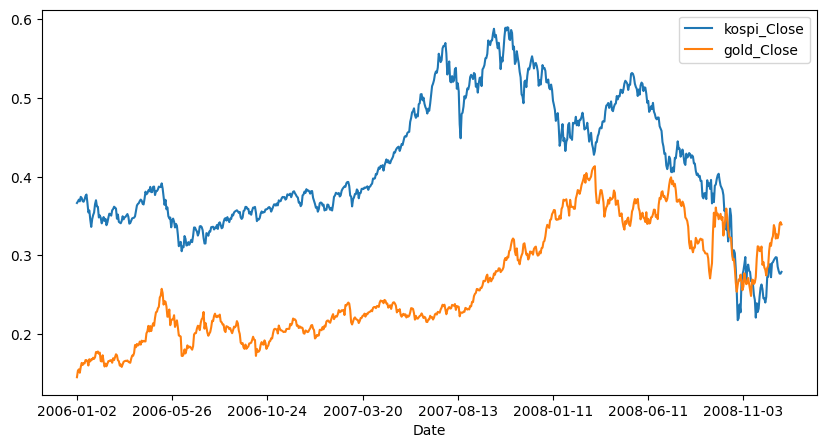

🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟




In [32]:
get_plot(all_data_scaling, 'kospi_Close', 'gold_Close', '2006', '2009')

### 공적분 분석

#### 전체 feature 중 공적분 분석을 하여 장기적으로 연관성이 높은 feature 추출

https://hyen4110.tistory.com/38

https://hyen4110.tistory.com/39

https://lsjsj92.tistory.com/584

In [ ]:
from statsmodels.tsa.stattools import coint

In [ ]:
all_data

In [ ]:
_, p_value, _ = coint(all_data.kospi_Close, all_data.gold_Close)
print('Correlation : ', all_data.kospi_Close.corr(all_data.gold_Close))
print('Cointegration test p-value : ' , p_value)

In [ ]:
def coint_with_kospi(df, index):
    _, p_value, _ = coint(df['kospi_Close'], df[index])
    print('\033[48;5;227m' + f'Kospi_{index} Cointegration' + '\033[0m')
    print('Correlation : ', df['kospi_Close'].corr(df[index]))
    print('Cointegration test p-value : ' , p_value)
    
    if p_value < 0.05:
        return '\033[34m' + '귀무가설 기각' + '\033[0m'
    else:
        return '\033[31m' + '귀무가설 채택' + '\033[0m'

In [ ]:
all_data.columns

In [ ]:
# len(list(cor_vis.index) + list(cor_vis2.index))
cor_over_7 = list(cor_vis.index) + list(cor_vis2.index)
cor_over_7

In [ ]:
for i in all_data:
    print(coint_with_kospi(all_data, str(i)) + '\n')

In [ ]:
for i in cor_over_7:
    print('\033[48;5;227m' + f'Kospi_{str(i)} Scatter' + '\033[0m')
    plt.scatter(all_data['kospi_Close'], all_data[str(i)])
    plt.show()

### 다중공선성 확인

https://blog.naver.com/sanghan1990/221121607688

https://ysyblog.tistory.com/171

#### 분산팽창지수 (VIF : Variance Inflation Factor)

https://zephyrus1111.tistory.com/66

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
low_period_data.columns

In [ ]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

str_list = ['bitcoin_Close', 'vix_Close', 'usd_krw_Close', 'us_unem_Value',
             'gold_Close', 'dollar_Close', 'wti_Close', 'brent_Close',
             'us_cpi_y_Change', 'us_cpi_m_Change', 'us_c_cpi_y_Change',
             'us_c_cpi_m_Change', 'kor_interest_Value', 'kor_cpi_y_Change',
             'kor_cpi_m_Change', 'jap_cpi_y_Change', 'jap_c_cpi_y_Change',
                'chi_cpi_y_Change', 'chi_cpi_m_Change', 'us_bond_yield_10_Close',
                'us_bond_yield_5_Close', 'us_bond_yield_3_Close',
                'us_bond_yield_1_Close', 'kor_bond_yield_10_Close',
                'kor_bond_yield_5_Close', 'kor_bond_yield_3_Close',
                'kor_bond_yield_1_Close', 'jap_bond_yield_10_Close',
                'jap_bond_yield_5_Close', 'jap_bond_yield_3_Close',
                'jap_bond_yield_1_Close', 'chi_bond_yield_10_Close',
                'chi_bond_yield_5_Close', 'chi_bond_yield_3_Close',
                'chi_bond_yield_1_Close', 'hsi_Close', 'szse_Close', 'ssec_Close',
                'nikkie_Close', 'ftse_Close', 'nasdaq_Close', 'russel2000_Close',
                'sp500_Close', 'dow_Close', 'kosdaq_Close', 'kospi_Close','dubai_Close']
result = listToString(str_list)
print(result)

In [ ]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)
 
sdf = low_period_data.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['bitcoin_Close', 'vix_Close', 'usd_krw_Close', 'us_unem_Value',
             'gold_Close', 'dollar_Close', 'wti_Close', 'brent_Close',
             'us_cpi_y_Change', 'us_cpi_m_Change', 'us_c_cpi_y_Change',
             'us_c_cpi_m_Change', 'kor_interest_Value', 'kor_cpi_y_Change',
             'kor_cpi_m_Change', 'jap_cpi_y_Change', 'jap_c_cpi_y_Change',
             'chi_cpi_y_Change', 'chi_cpi_m_Change', 'us_bond_yield_10_Close',
             'us_bond_yield_5_Close', 'us_bond_yield_3_Close',
             'us_bond_yield_1_Close', 'kor_bond_yield_10_Close',
             'kor_bond_yield_5_Close', 'kor_bond_yield_3_Close',
             'kor_bond_yield_1_Close', 'jap_bond_yield_10_Close',
             'jap_bond_yield_5_Close', 'jap_bond_yield_3_Close',
             'jap_bond_yield_1_Close', 'chi_bond_yield_10_Close',
             'chi_bond_yield_5_Close', 'chi_bond_yield_3_Close',
             'chi_bond_yield_1_Close', 'hsi_Close', 'szse_Close', 'ssec_Close',
             'nikkie_Close', 'ftse_Close', 'nasdaq_Close', 'russel2000_Close',
             'sp500_Close', 'dow_Close', 'kosdaq_Close', 'kospi_Close','dubai_Close']]

corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬
 
## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다. 
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('kospi_Close ~ bitcoin_Close + vix_Close + usd_krw_Close \
                       + us_unem_Value + gold_Close + dollar_Close + wti_Close + brent_Close + us_cpi_y_Change \
                       + us_cpi_m_Change + us_c_cpi_y_Change + us_c_cpi_m_Change + kor_interest_Value \
                       + kor_cpi_y_Change + kor_cpi_m_Change + jap_cpi_y_Change + jap_c_cpi_y_Change \
                       + chi_cpi_y_Change + chi_cpi_m_Change + us_bond_yield_10_Close + us_bond_yield_5_Close \
                       + us_bond_yield_3_Close + us_bond_yield_1_Close + kor_bond_yield_10_Close + kor_bond_yield_5_Close \
                       + kor_bond_yield_3_Close + kor_bond_yield_1_Close + jap_bond_yield_10_Close + jap_bond_yield_5_Close \
                       + jap_bond_yield_3_Close + jap_bond_yield_1_Close + chi_bond_yield_10_Close + chi_bond_yield_5_Close \
                       + chi_bond_yield_3_Close + chi_bond_yield_1_Close + hsi_Close + szse_Close + ssec_Close + nikkie_Close \
                       + ftse_Close + nasdaq_Close + russel2000_Close + sp500_Close + dow_Close + kosdaq_Close + kospi_Close \
                       + dubai_Close', data = low_period_data).fit()

In [ ]:
## 모형 정의(실제적합은 일어나지 않는다.)
model = ols('kospi_Close ~ bitcoin_Close + vix_Close + usd_krw_Close \
                       + us_unem_Value + gold_Close + dollar_Close + wti_Close + brent_Close + us_cpi_y_Change \
                       + us_cpi_m_Change + us_c_cpi_y_Change + us_c_cpi_m_Change + kor_interest_Value \
                       + kor_cpi_y_Change + kor_cpi_m_Change + jap_cpi_y_Change + jap_c_cpi_y_Change \
                       + chi_cpi_y_Change + chi_cpi_m_Change + us_bond_yield_10_Close + us_bond_yield_5_Close \
                       + us_bond_yield_3_Close + us_bond_yield_1_Close + kor_bond_yield_10_Close + kor_bond_yield_5_Close \
                       + kor_bond_yield_3_Close + kor_bond_yield_1_Close + jap_bond_yield_10_Close + jap_bond_yield_5_Close \
                       + jap_bond_yield_3_Close + jap_bond_yield_1_Close + chi_bond_yield_10_Close + chi_bond_yield_5_Close \
                       + chi_bond_yield_3_Close + chi_bond_yield_1_Close + hsi_Close + szse_Close + ssec_Close + nikkie_Close \
                       + ftse_Close + nasdaq_Close + russel2000_Close + sp500_Close + dow_Close + kosdaq_Close + kospi_Close \
                       + dubai_Close', data = low_period_data)
 
variables = []
reg_coef = []
vif = []
for i in range(len(model.exog_names)):
    col_name = model.exog_names[i]
    variables.append(col_name)
    reg_coef.append(model.fit().params[col_name])
    vif.append(variance_inflation_factor(model.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
df_res

#### PCA

https://jalynne-kim.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9D-pca-principal-component-analysis-%EA%B3%BC-biplot-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%82%AC%EB%A1%80-%EB%A0%88%EB%93%9C%EC%99%80%EC%9D%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0-437283592031

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 표준화
scaler = StandardScaler()
A = scaler.fit_transform(low_period_data)
print("\n Standardized Data: \n", A)

In [ ]:
# projection, pca 매트릭스 만들기
pca_low_period_data = PCA()
pca_low_period_data.fit(A)

print("\n Eigenvectors: \n", pca_low_period_data.components_)
print("\n Eigenvalues: \n",pca_low_period_data.explained_variance_)

B = pca_low_period_data.transform(A)
print("\n Projected Data: \n", B)

PCA 시각화 (Biplot)

In [ ]:
def biplot(score, coeff, pcax, pcay, labels=None):
    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score[:, pca1]
    ys = score[:, pca2]
    n = score.shape[1]
    scalex = 1.0 / (xs.max()- xs.min())
    scaley = 1.0 / (ys.max()- ys.min())
    plt.figure(figsize=(30,30))
    plt.scatter(xs * scalex, ys * scaley)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2],color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,pca1] * 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1] * 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [ ]:
biplot(B, pca_low_period_data.components_, 1, 2, labels = low_period_data.columns)

컬럼수 변경하여 PCA 하면 다른 결과가 나옴

### scatter plot 확인

In [ ]:
df = all_data_scaling[['hsi_Close', 'gold_Close', 'jap_bond_yield_5_Close','kospi_Close']].copy()
df = df.diff().dropna()

In [ ]:
n = 8620
colors = np.random.rand(n)

plt.figure(figsize=(8,6))
plt.scatter(x = df.kospi_Close, y = df.hsi_Close, c=colors, alpha=0.8, cmap='plasma')
plt.title('kospi_hsi_scatter')
plt.colorbar()
plt.show()

In [ ]:
n = 8620
colors = np.random.rand(n)

plt.figure(figsize=(8,6))
plt.scatter(x = df.kospi_Close, y = df.gold_Close, c=colors, alpha=0.8, cmap='plasma')
plt.title('kospi_gold_scatter')
plt.colorbar()
plt.show()

In [ ]:
n = 8620
colors = np.random.rand(n)

plt.figure(figsize=(8,6))
plt.scatter(x = df.kospi_Close, y = df.jap_bond_yield_5_Close, c=colors, alpha=0.8, cmap='plasma')
plt.title('kospi_jap_bond_yield_5_scatter')
plt.colorbar()
plt.show()

# Modeling

## 정상성 확인

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# ACF and PACF 

lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

# ACF
plt.figure(figsize=(16,8))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
for i in data:
    plot_acf(data[i], lags=50)
    plt.title('ACF for %s' % i)
    plt.show()

for i in data:
    plot_pacf(data[i], lags=50)
    plt.title('PACF for %s' % i)
    plt.show()

In [ ]:
def adf(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [ ]:
adf(df)

In [ ]:
def adf(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

for i in data:
    print('--Test statistic for %s' % i)
    adf(data[i])

---

## Univariate Time Series

### ARIMA

https://colab.research.google.com/drive/1wAa1c7QH25x2tggiYCo6SUTKOkE-y_Xq#scrollTo=CdsgVdhp-Kbr

In [ ]:
import statsmodels.api as sm

In [ ]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

In [ ]:
kospi['Date'] = pd.to_datetime(kospi['Date'], format='%Y-%m-%d') #, errors=raise)

In [ ]:
kospi.set_index('Date', inplace=True)

In [ ]:
kospi.info()

In [ ]:
# KOSPI 1년 기준
kospi = kospi.iloc[-200:].copy()

In [ ]:
# fit model
model = sm.tsa.arima.ARIMA(kospi, order=(1,1,1)) # (ARMA) = (1,0,1)
model_fit = model.fit() # disp=0)

train_range = int(len(kospi.index) * 0.8)

# predict
start_index = kospi.index[train_range]
end_index = kospi.index[-1]
forecast = model_fit.predict(start=start_index, end=end_index) # start=start_index, end=end_index

# visualization
plt.figure(figsize=(22,10))
plt.plot(kospi.index[train_range:], kospi.Close[train_range:], label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Kospi Predict")
plt.xticks(forecast.index[::10])
plt.xlabel("Date")
plt.ylabel("Kospi Price")
plt.legend()
plt.show()

In [ ]:
y_test = kospi[train_range:]
y_pred = forecast

#### Evaluation

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [68]:
def MSE(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)
    
def RMSE(mse):
    return np.sqrt(mse)

def MAE(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)

def MAPE(y_test, y_pred): 
    y_test = y_test.values
    y_pred = y_pred.values
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
'''
# Define SMAPE loss function
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100
'''

'\n# Define SMAPE loss function\ndef SMAPE(true, pred):\n    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100\n'

In [ ]:
print('MSE: %f' % MSE(y_test, y_pred))
print('RMSE: %f' % RMSE(MSE(y_test, y_pred)))    
print('MAE: %f' % MAE(y_test, y_pred))
print('MAPE: %f' % MAPE(y_test, y_pred))
# print('SMAPE: %f' % SMAPE(y_test, y_pred))

In [ ]:
# lst 내에서, 가장 적게 수집된 데이터를 기준으로 concat

def concat_data(lst):
    # 최소 기간 data 추출
    df_min_len = len(lst[0])
    for _ in range(len(lst)):
        if df_min_len >= len(lst[_]):
            df_min_len = len(lst[_])
            df_min = lst[_]
    x = df_min

    for i in lst:
        if x.columns[1] == i.columns[1]:
            pass
        elif i.columns[1] == lst[0].columns[1]:
            oneone = pd.merge(lst[0], x, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)
        else:
            oneone = pd.merge(i, oneone, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)

    oneone = oneone.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(oneone.values)
    # {main_kospi}_concat
#     main_kospi_concat = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
#     bon_yield_kospi_concat = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
#     other_kospi_concat = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
    all_feature = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
    
#     return main_kospi_concat
#     return bon_yield_kospi_concat
#     return other_kospi_concat
    return all_feature


---

### LSTM

https://colab.research.google.com/drive/1lWvMZyR2vzK6uXHrxTuBuhBLrdrGl7bx#scrollTo=poQuNXT2Sof9

https://www.kaggle.com/code/bryanb/stock-prices-forecasting-with-lstm

In [ ]:
df = kospi.reset_index().copy()

In [ ]:
# Define a specific window for training Neural Network 
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [ ]:
TRAIN_SPLIT = 8000 ## about 2083 days
tf.random.set_seed(13) ##

In [ ]:
# Extract temperature (degree) data & Make univariate series
uni_data = df['kospi_Close']
uni_data.index = df['Date']
print(uni_data.head())

In [ ]:
# Standardization
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data - uni_train_mean) / uni_train_std  # Standardization

print(uni_data)

In [ ]:
univariate_past_history = 20
univariate_future_target = 0

## univariate_data 함수 이용
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                         univariate_past_history,
                                         univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                     univariate_past_history,
                                     univariate_future_target)

print('Single window of past history')
print(x_train_uni[0])
print('\n Target temperature to predict')
print(y_train_uni[0])

In [ ]:
# Defind function for Visualization
def create_time_steps(length):
    return list(range(-length, 0))


def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [ ]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example').show()

In [ ]:
def baseline(history):
    return np.mean(history)

show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0, 'Sample Example').show()

In [ ]:
import tensorflow as tf

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

In [ ]:
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
train_univariate

In [ ]:
np.array(x_train_uni).shape[-2:]

In [ ]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=np.array(x_train_uni).shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

#### Train Model

In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

#### Forecasts & Visualize

In [ ]:
# Make forecasts & Visualize

for x, y in val_univariate.take(30):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                      simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [ ]:
val_univariate.take(7)

---

### Prophet

https://colab.research.google.com/drive/1i9BhC6SZ1peIO8TG_uDJpn_jzsQaI7W0#scrollTo=D6B7LpdaKo_P

In [ ]:
df = kospi

In [ ]:
df.plot()

In [ ]:
# !pip3 install plotnine

In [ ]:
# import necessary libraries
import numpy as np # linear algebra
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

import warnings
warnings.filterwarnings('ignore')  # Hide warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io

# we'll use the statistics package to conduct some predictive analytics
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error

In [ ]:
# check total number of cells, first few rows, and descriptive stats 
def descriptive_info(df):
    #  number_of_cells = df.count(axis=0, level=None, numeric_only=False)
    # Let's check the shape of the dataset
    print('Features:', df.shape[1], ' ', 'Entries:', df.shape[0])
    print('\n\n')
    print('Printing descriptive statistics...\n\n', df.describe())

In [ ]:
# now check some basic info of our dataset
descriptive_info(df)

In [ ]:
# Let's define a function to check the type of our features and check for 
# missing values in our dataset
def missing_val(df):
    print(df.info())
    print('\n\nFeatures with missing values in descending order \n\n')
    print((df.isnull().sum()/ df.shape[0]).sort_values(ascending=False))

In [ ]:
# Now apply the missing_val function
missing_val(df)

In [ ]:
# df.reset_index(inplace=True)

In [ ]:
# This Function is to prepare the dataset for Fb Prophet
#ds, save the name of date column as ds
#y, save the name of column we are interested in as y
def prepare_data(df, ds, y):
    '''
    input: df = dataframe
    ds = date column
    y = prediction column
    '''
    df = df[[ds, y]]
    df = df.rename(columns={ds: "ds", y: "y"}) #now it is usable for FB Prophet, let's check the new file
    print('The series is ready for use.\n')
    return df

In [ ]:
# Use the function to prepare the dataframe to feed into fbprophet
# df = series, ds = the time variable name from the dataframe (string), 
# y = intended variable name for prediction from the dataframe, (string)
df2 = prepare_data(df, ds = 'Date', y = 'kospi_Close') 
print(df2.head())
print('')
print('The length of your series is: ', len(df2))

In [ ]:
## function to Plot the prepared data
def _fig_plot(df, X, Y):
    ''' Function plots the data. requires to provide dataframe in the
    format of date as ds, observation as y, Preset other variables e.g., axis name
    '''
    df.plot(x = X, y = Y, figsize=Figsize, label = Label)
    plt.xlabel(xAxisLabel, fontsize = 16)
    plt.ylabel(yAxisLabel, fontsize = 16)
    plt.legend()
    plt.title(Title, fontsize = 20)
    ax = plt.gca().get_xaxis()

In [ ]:
# provide variable names and other required inputs to plot using the function
X = 'ds'
Y = 'y'
Label = "closing price"
Figsize = (16,8)
Title = "Kospi Stock Price"
xAxisLabel = 'Time (Day)'
yAxisLabel = 'Price (won)'
_fig_plot(df2, X, Y)

추세 파악을 위한 짧은 기간 확인

In [ ]:
shortX = df2[['ds', 'y']].tail(100)
shortX = shortX.rename(columns = {'ds': 'dss', 'y':'yss'}) 
#shortY = df2.loc[shortX]
shortX.head()
#print(len(shortX), len(shortY))

In [ ]:
# provide variable names and other required inputs to plot using the function
X = 'dss'
Y = 'yss'
Label = "closing price"
Figsize = (20,8)
Title = "Kospi Stock Price"
xAxisLabel = 'Time (Day)'
yAxisLabel = 'Price (won)'
_fig_plot(shortX, X, Y)

In [ ]:
# let's predict now
# instantiate the model and fit the timeseries
'''
prophet = Prophet(daily_seasonality = 'auto',
                  weekly_seasonality = 'auto',
                  yearly_seasonality = 'auto', 
#                   growth='linear', 
                  changepoints = None, 
                  n_changepoints = 25, 
                  changepoint_range = 0.8,  
#                   holidays=holiday,
#                   holidays=None,
#                   seasonality_mode='additive', 
                  seasonality_prior_scale = 10, # 계절성 영향
                  holidays_prior_scale = 10, # 휴일의 영향
                  changepoint_prior_scale = 0.05, # 0.05보다 크면 추세 유연하게 반응
                  mcmc_samples=0, 
                  interval_width=0.8, 
                  uncertainty_samples=1000, 
                  stan_backend=None)
prophet.add_seasonality(name='monthly', period=30.5, fourier_order=12) # 임의로 계절성 추가
prophet.add_country_holidays(country_name='KR') # 한국의 휴일 추가
'''
prophet = Prophet()
prophet.fit(df2)

# create a future data frame 
future = prophet.make_future_dataframe(periods=60)
forecast = prophet.predict(future)

In [ ]:
forecast.trend.plot()

In [ ]:
# summarize the forecast
print('Printing outputs from Prophet prediction...\n', forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
prophet.plot(forecast)
plt.show()

In [ ]:
# Python
plot_plotly(prophet, forecast)

In [ ]:
forecast.yhat.plot()

In [ ]:
df2

In [ ]:
plt.figure(figsize=(16, 8))#, dpi=80)

plt.plot(df2['y'].tail(1000).values, label='Actual')
plt.plot(forecast['yhat'].tail(1000).values, label='Predicted')
plt.legend()
plt.show()

In [ ]:
forecast['yhat'].tail(100).plot()

In [ ]:
# plot the components of forcasted series
fig2 = prophet.plot_components(forecast)
plt.show()

#### Evaluation

In [ ]:
# use built in fbprophet evaluation function and metrix
evaluation_model = cross_validation(prophet, initial='400 days', period='60 days', horizon = '30 days')

In [ ]:
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('rmse').head(5)

***

## Multivariate Time Series

Make Multivariate Data From Kospi Period
- 코스피 데이터 최대 활용 목적

In [ ]:
for i in variables:
    print(i.info())

In [ ]:
'''
kospi 기준으로 concat
'''

def concat_data(lst, x):
    for i in lst:
        if i.columns[1] == x.columns[1]:
            pass
        else:
            oneone = pd.merge(i, x, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'bfill', inplace = True)
            oneone.fillna(method = 'ffill', inplace = True)
            
            x = oneone
            
    oneone = oneone.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(oneone.values)
    df = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
    
    return df


In [ ]:
all_data = concat_data(variables, kospi)
all_data

In [ ]:
all_data.plot(subplots=True, figsize=(30,100))
plt.show()

Make Multivariate Data From Low Length Period
- NULL 값 임의 처리 최소화 목적

In [ ]:
# lst 내에서, 기간이 가장 짧게 수집된 데이터를 기준으로 concat

def concat_data_lower_length(lst):
    # 최소 기간 data 추출
    df_min = lst[0]
    for _ in range(len(lst)):
        if len(lst[_]) < 500:
            pass
        elif len(lst[_]) <= len(df_min):
            df_min = lst[_]
    x = df_min

    for i in lst:
        if i.columns[1] == x.columns[1]:
            pass
        elif i.columns[1] == lst[0].columns[1]:
            oneone = pd.merge(lst[0], x, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)
            oneone.fillna(method = 'bfill', inplace = True)
        else:
            oneone = pd.merge(i, oneone, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)
            oneone.fillna(method = 'bfill', inplace = True)

    oneone = oneone.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(oneone.values)
    df = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)

#     return x
    return df

In [ ]:
low_period_data = concat_data_lower_length(variables)
low_period_data.plot(subplots=True, figsize=(30,100))
plt.show()

---

---

### XGBoost

https://sosoeasy.tistory.com/388

https://dacon.io/competitions/official/235736/codeshare/2877
https://magoker.tistory.com/106

#### 전체 feature 회귀 분석

In [ ]:
# !pip3 install sktime
# !pip install xgboost

In [12]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from xgboost import XGBRegressor
import xgboost

C:\users\hsl\desktop\lhs\Lib\site-packages\sktime\__init__.py:45: PackageDeprecationWarning: 
The sktime PyPI package is deprecated.
The sktime project split into two projects.

To find out how to install the new packages, please go to:

* https://github.com/aeon-toolkit/aeon
* https://github.com/sktime/sktime

Here is what you can do when installing sktime via pip (e.g. using `pip install ...` or a requirement file like `requirements.txt`, `setup.py`, `setup.cfg`):

* continue using the package without receiving any updates (ignoring the deprecation warning or avoiding it by pinning the version: `sktime==0.18.0`),
* replace sktime with one of the new projects,
* if the sktime package is used by one of your dependencies, it would be great if you take some time to track which package uses sktime and report to their issue tracker that sktime is deprecated.

More information is available at:
https://github.com/mloning/sktime-deprecation/discussions/2

If the previous advice does not suppo

In [13]:
all_data.reset_index(inplace=True)

In [14]:
all_data.Date

0       1990-01-03
1       1990-01-04
2       1990-01-05
3       1990-01-06
4       1990-01-08
           ...    
8616    2023-03-09
8617    2023-03-10
8618    2023-03-13
8619    2023-03-14
8620    2023-03-15
Name: Date, Length: 8621, dtype: object

In [15]:
train_all = all_data.drop('Date', axis=1).copy()

In [16]:
train_all

,bitcoin_Close,vix_Close,usd_krw_Close,us_unem_Close,gold_Close,dollar_Close,wti_Close,dubai_Close,brent_Close,us_cpi_y_Close,...,szse_Close,ssec_Close,nikkie_Close,ftse_Close,nasdaq_Close,russel2000_Close,sp500_Close,dow_Close,kosdaq_Close,kospi_Close
0,0.1,18.19,683.50,0.054,398.7,95.220,23.68,104.00,21.69,0.052,...,1151.58,104.39,13867.61,5562.52,460.90,484.39,358.80,2809.73,557.00,908.59
1,0.1,19.22,684.20,0.054,403.2,93.160,23.41,104.00,21.51,0.052,...,1151.58,104.39,13867.61,5562.52,459.39,484.39,355.70,2796.08,557.00,928.82
2,0.1,20.11,683.70,0.054,410.9,93.620,23.08,104.00,22.00,0.052,...,1151.58,104.39,13867.61,5562.52,458.22,484.39,352.20,2773.25,557.00,915.11
3,0.1,20.11,683.70,0.054,410.9,93.620,23.08,104.00,22.00,0.052,...,1151.58,104.39,13867.61,5562.52,458.22,484.39,352.20,2773.25,557.00,912.86
4,0.1,20.26,683.60,0.054,407.2,92.800,21.62,104.00,20.52,0.052,...,1151.58,104.39,13867.61,5562.52,458.71,484.39,353.80,2794.37,557.00,919.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8616,20361.8,22.61,1325.51,0.035,1834.6,105.305,75.72,81.24,81.59,0.060,...,11579.99,3276.09,28623.15,13118.81,11338.36,1826.59,3918.32,32256.05,809.22,2419.09
8617,20156.7,24.80,1320.24,0.035,1867.2,104.552,76.68,82.16,82.78,0.060,...,11442.54,3230.08,28143.97,12965.40,11138.89,1772.70,3861.59,31909.96,788.60,2394.59
8618,24114.4,26.52,1296.58,0.035,1916.5,103.713,74.80,81.01,80.77,0.060,...,11505.02,3268.70,27832.96,13079.91,11188.84,1744.30,3855.76,31819.05,788.89,2410.60
8619,24699.7,23.73,1304.55,0.035,1910.9,103.215,71.33,79.20,77.45,0.060,...,11416.57,3245.31,27222.04,12995.57,11428.15,1776.89,3920.56,32153.89,758.05,2348.97


In [17]:
date = pd.to_datetime(all_data.Date)
train_all['day2'] = date.dt.day_of_year  # 1 ~ 365
train_all['day'] = date.dt.weekday       # Monday ~
train_all['month'] = date.dt.month       # Month
train_all['quarter'] = date.dt.quarter   # 분기

In [ ]:
train_all.quarter.value_counts()

In [18]:
train_all

,bitcoin_Close,vix_Close,usd_krw_Close,us_unem_Close,gold_Close,dollar_Close,wti_Close,dubai_Close,brent_Close,us_cpi_y_Close,...,nasdaq_Close,russel2000_Close,sp500_Close,dow_Close,kosdaq_Close,kospi_Close,day2,day,month,quarter
0,0.1,18.19,683.50,0.054,398.7,95.220,23.68,104.00,21.69,0.052,...,460.90,484.39,358.80,2809.73,557.00,908.59,3,2,1,1
1,0.1,19.22,684.20,0.054,403.2,93.160,23.41,104.00,21.51,0.052,...,459.39,484.39,355.70,2796.08,557.00,928.82,4,3,1,1
2,0.1,20.11,683.70,0.054,410.9,93.620,23.08,104.00,22.00,0.052,...,458.22,484.39,352.20,2773.25,557.00,915.11,5,4,1,1
3,0.1,20.11,683.70,0.054,410.9,93.620,23.08,104.00,22.00,0.052,...,458.22,484.39,352.20,2773.25,557.00,912.86,6,5,1,1
4,0.1,20.26,683.60,0.054,407.2,92.800,21.62,104.00,20.52,0.052,...,458.71,484.39,353.80,2794.37,557.00,919.46,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8616,20361.8,22.61,1325.51,0.035,1834.6,105.305,75.72,81.24,81.59,0.060,...,11338.36,1826.59,3918.32,32256.05,809.22,2419.09,68,3,3,1
8617,20156.7,24.80,1320.24,0.035,1867.2,104.552,76.68,82.16,82.78,0.060,...,11138.89,1772.70,3861.59,31909.96,788.60,2394.59,69,4,3,1
8618,24114.4,26.52,1296.58,0.035,1916.5,103.713,74.80,81.01,80.77,0.060,...,11188.84,1744.30,3855.76,31819.05,788.89,2410.60,72,0,3,1
8619,24699.7,23.73,1304.55,0.035,1910.9,103.215,71.33,79.20,77.45,0.060,...,11428.15,1776.89,3920.56,32153.89,758.05,2348.97,73,1,3,1


In [ ]:
x = train_all.drop('kospi_Close', axis=1)
y = train_all.kospi_Close

In [ ]:
y_train, y_valid, x_train, x_valid = temporal_train_test_split(X = x, y = y, test_size = 0.2)


In [ ]:
print('train data shape\nx:{}, y:{}'.format(x_train.shape, y_train.shape))

plot_series(y_train, y_valid, markers=[',' , ','])
plt.show()

In [ ]:
xgb_reg = XGBRegressor()

xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
            early_stopping_rounds=300, verbose=False)

In [ ]:
## 주황색 : 실제값, 초록색 : 예측값

pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
# print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_valid, label = "original")
plt.plot(pred, label = "predicted")

plt.title('All_Feature_Trained_XGBoost')
plt.legend()
plt.show()

💛 Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print('MSE: %f' % MSE(y_valid, pred))
print('RMSE: %f' % RMSE(MSE(y_valid, pred)))    
print('MAE: %f' % MAE(y_valid, pred))
print('MAPE: %f' % MAPE(y_valid, pred))

💛 Feature Importance

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(50,50))

axes = [ax for row_axes in axes for ax in row_axes]
model = xgb_reg

xgboost.plot_importance(model, importance_type='gain', title=' xgboost_gain', xlabel='', grid=False, ax=axes[0])
# xgboost.plot_importance(model, importance_type='cover', title='cover', xlabel='', grid=False, ax=axes[1])
# xgboost.plot_importance(model, importance_type='weight', title='weight', xlabel='', grid=False, ax=axes[2])
# xgboost.plot_importance(model, importance_type='total_gain', title='total_gain', xlabel='', grid=False, ax=axes[3])
# xgboost.plot_importance(model, importance_type='total_cover', title='total_cover', xlabel='', grid=False, ax=axes[4])

# plt.tight_layout()
plt.show()

#### SHAP

https://www.kaggle.com/code/bryanb/xgboost-explainability-with-shap

In [ ]:
# !pip install shap 

In [ ]:
import shap

In [ ]:
# !pip install "numpy<1.24.0"

In [ ]:
np.__version__

In [ ]:
model = XGBRegressor().fit(x_train, y_train)

explainer = shap.TreeExplainer(model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(x_train) # Shap Values 계산

In [ ]:
shap.summary_plot(shap_values, x_train)

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")


#### 공적분 관계가 높은 feature만 가지고 회귀 분석

feature_importance가 높게 나온 hsi 지수, 유의미한 공적분 관계인 지표인 금, 일본 국채 5년물만 가지고 다시 예측

In [19]:
train_importance = train_all[['gold_Close', 'jap_bond_yield_5_Close', 'hsi_Close', 'kospi_Close', 'day2', 'day', 'month', 'quarter']].copy()

In [20]:
train_importance

,gold_Close,jap_bond_yield_5_Close,hsi_Close,kospi_Close,day2,day,month,quarter
0,398.7,1.403,14573.21,908.59,3,2,1,1
1,403.2,1.403,14573.21,928.82,4,3,1,1
2,410.9,1.403,14573.21,915.11,5,4,1,1
3,410.9,1.403,14573.21,912.86,6,5,1,1
4,407.2,1.403,14573.21,919.46,8,0,1,1
...,...,...,...,...,...,...,...,...
8616,1834.6,0.229,19925.74,2419.09,68,3,3,1
8617,1867.2,0.195,19319.92,2394.59,69,4,3,1
8618,1916.5,0.170,19695.97,2410.60,72,0,3,1
8619,1910.9,0.121,19247.96,2348.97,73,1,3,1


In [ ]:
x = train_importance.drop('kospi_Close', axis=1)
y = train_importance.kospi_Close

In [ ]:
y_train, y_valid, x_train, x_valid = temporal_train_test_split(X = x, y = y, test_size = 0.2)

In [ ]:
print('train data shape\nx:{}, y:{}'.format(x_train.shape, y_train.shape))

plot_series(y_train, y_valid, markers=[',' , ','])
plt.show()

In [ ]:
xgb_reg = XGBRegressor()

xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
            early_stopping_rounds=300, verbose=False)

In [ ]:
## 주황색 : 실제값, 초록색 : 예측값

pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
# print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_valid, label = "original")
plt.plot(pred, label = "predicted")

plt.title('Importance_Feature_Trained_XGBoost')
plt.legend()
plt.show()

💛 Evaluation

In [ ]:
print('MSE: %f' % MSE(y_valid, pred))
print('RMSE: %f' % RMSE(MSE(y_valid, pred)))    
print('MAE: %f' % MAE(y_valid, pred))
print('MAPE: %f' % MAPE(y_valid, pred))

💛 Feature Importance

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(50,50))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(50,50))

axes = [ax for row_axes in axes for ax in row_axes]
model = xgb_reg

xgboost.plot_importance(model, importance_type='gain', title=' xgboost_gain', xlabel='', grid=False, ax=axes[0])
# xgboost.plot_importance(model, importance_type='cover', title='cover', xlabel='', grid=False, ax=axes[1])
# xgboost.plot_importance(model, importance_type='weight', title='weight', xlabel='', grid=False, ax=axes[2])
# xgboost.plot_importance(model, importance_type='total_gain', title='total_gain', xlabel='', grid=False, ax=axes[3])
# xgboost.plot_importance(model, importance_type='total_cover', title='total_cover', xlabel='', grid=False, ax=axes[4])

# plt.tight_layout()
plt.show()

#### SHAP

https://www.kaggle.com/code/bryanb/xgboost-explainability-with-shap

In [ ]:
# !pip install shap 

In [ ]:
import shap

In [ ]:
# !pip install "numpy<1.24.0"

In [ ]:
np.__version__

In [ ]:
model = XGBRegressor().fit(x_train, y_train)

explainer = shap.TreeExplainer(model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(x_train) # Shap Values 계산

In [ ]:
shap.summary_plot(shap_values, x_train)

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")


#### Parameter Tuning

In [21]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

In [28]:
grid = {'n_estimators' : [100], 
        'eta' : [0.01], 
        'min_child_weight' : np.arange(1, 8, 1), 
        'max_depth' : np.arange(3,9,1) ,
        'colsample_bytree' :np.arange(0.8, 1.0, 0.1), 
        'subsample' :np.arange(0.8, 1.0, 0.1)} # fix the n_estimators & eta(learning rate)
        
for i in tqdm(np.arange(1, 61)):
    x = train_importance.drop('kospi_Close', axis=1)
    y = train_importance.kospi_Close
    ll = int(len(x) * 0.2)
    y_train, y_test, x_train, x_test = temporal_train_test_split(y = y, X = x, test_size = ll)
    
    pds = PredefinedSplit(np.append(-np.ones(len(x)-ll), np.zeros(ll)))
    gcv = GridSearchCV(estimator = XGBRegressor(gpu_id = 0, tree_method = 'gpu_hist', predictor= 'gpu_predictor'),#seed = 0, gpu_id = 1, tree_method = 'gpu_hist', predictor= 'gpu_predictor'),
                       param_grid = grid, # scoring = smape, 
                       #cv = pds, 
                       refit = True, verbose = True)
    
    gcv.fit(x_train, y_train)
    best = gcv.best_estimator_
    params = gcv.best_params_
    print(params)
    
    pred = best.predict(x_test)
    building = 'building'+str(i)
#     print(building + '|| SMAPE : {}'.format(SMAPE(y_test, pred)))
#     preds = np.append(preds, pred)
#     df = pd.concat([df, pd.DataFrame(params, index = [0])], axis = 0)
#     df.to_csv('./hyperparameter_xgb.csv', index = False) # save the tuned parameters

  0%|                                                                             | 0/60 [00:00<?, ?it/s]

Fitting 5 folds for each of 168 candidates, totalling 840 fits


  2%|█                                                                 | 1/60 [03:32<3:28:45, 212.29s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


  3%|██▏                                                               | 2/60 [07:04<3:25:14, 212.32s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


  5%|███▎                                                              | 3/60 [10:36<3:21:31, 212.12s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


  7%|████▍                                                             | 4/60 [14:08<3:18:02, 212.20s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


  8%|█████▌                                                            | 5/60 [17:41<3:14:31, 212.21s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 10%|██████▌                                                           | 6/60 [21:13<3:11:06, 212.34s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 12%|███████▋                                                          | 7/60 [24:46<3:07:39, 212.45s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 13%|████████▊                                                         | 8/60 [28:18<3:04:01, 212.34s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 15%|█████████▉                                                        | 9/60 [31:50<3:00:30, 212.36s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 17%|██████████▊                                                      | 10/60 [35:23<2:56:55, 212.30s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 18%|███████████▉                                                     | 11/60 [38:55<2:53:30, 212.45s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 20%|█████████████                                                    | 12/60 [42:29<2:50:10, 212.72s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 22%|██████████████                                                   | 13/60 [46:01<2:46:37, 212.72s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 23%|███████████████▏                                                 | 14/60 [49:34<2:42:59, 212.60s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 25%|████████████████▎                                                | 15/60 [53:06<2:39:23, 212.52s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 27%|█████████████████▎                                               | 16/60 [56:39<2:35:56, 212.65s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 28%|█████████████████▊                                             | 17/60 [1:00:12<2:32:30, 212.80s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 30%|██████████████████▉                                            | 18/60 [1:03:45<2:28:54, 212.72s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 32%|███████████████████▉                                           | 19/60 [1:07:17<2:25:20, 212.70s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 33%|█████████████████████                                          | 20/60 [1:10:50<2:21:48, 212.72s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 35%|██████████████████████                                         | 21/60 [1:14:23<2:18:18, 212.78s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 37%|███████████████████████                                        | 22/60 [1:17:55<2:14:37, 212.56s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 38%|████████████████████████▏                                      | 23/60 [1:21:28<2:11:04, 212.55s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 40%|█████████████████████████▏                                     | 24/60 [1:25:01<2:07:37, 212.72s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 42%|██████████████████████████▎                                    | 25/60 [1:28:33<2:04:03, 212.66s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
Fitting 5 folds for each of 168 candidates, totalling 840 fits


 42%|██████████████████████████▎                                    | 25/60 [1:30:51<2:07:12, 218.06s/it]


KeyboardInterrupt: 

In [48]:
xgb_param ={'n_estimators' : 100,
            'learning_rate' : 0.01,
            'max_depth' : 5,
            'colsample_bytree' : 0.8,
            'min_child_weight': 7, 
            'subsample': 0.9}


In [49]:
model = XGBRegressor()

In [50]:
xgb_grid = GridSearchCV(model, param_grid = xgb_param, scoring = 'f1_micro', n_jobs=-1, verbose = 2)
xgb_grid.fit(x_train, y_train)
best_xg = xgb_grid.best_estimator_
best_xg

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


KeyboardInterrupt: 

In [64]:
xgb_reg = XGBRegressor(n_estimators = 300,
                       learning_rate=0.1,
                       max_depth=5,
                       colsample_bytree= 0.8,
                       min_child_weight=7, 
                       subsample=0.9)

y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = ll)

xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
            early_stopping_rounds=300, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

best iterations: 298


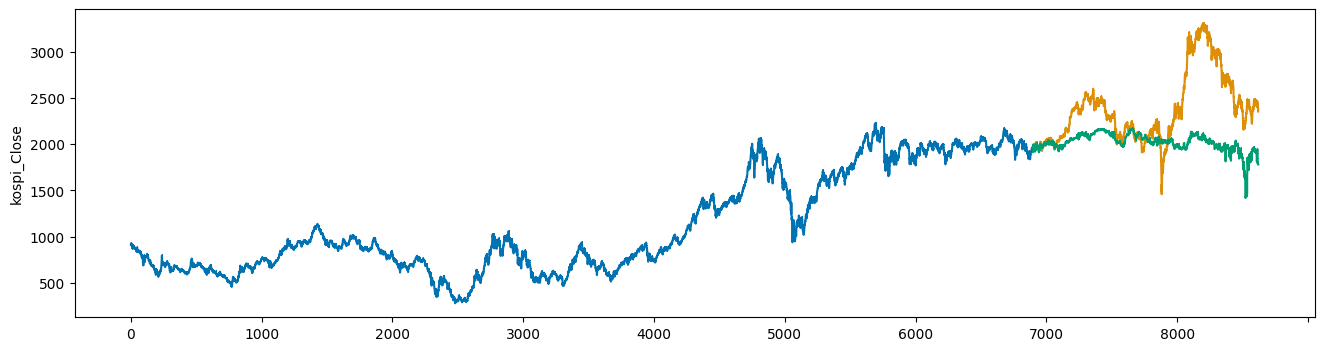

In [65]:
## 주황색 : 실제값, 초록색 : 예측값

pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
# print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

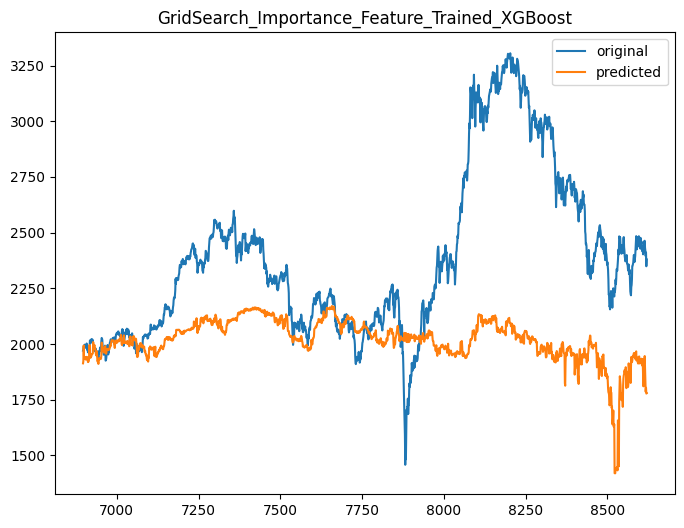

In [72]:
plt.figure(figsize=(8,6))
plt.plot(y_valid, label = "original")
plt.plot(pred, label = "predicted")

plt.title('GridSearch_Importance_Feature_Trained_XGBoost')
plt.legend()
plt.show()

In [71]:
print('MSE: %f' % MSE(y_valid, pred))
print('RMSE: %f' % RMSE(MSE(y_valid, pred)))    
print('MAE: %f' % MAE(y_valid, pred))
print('MAPE: %f' % MAPE(y_valid, pred))

MSE: 273777.064665
RMSE: 523.237102
MAE: 382.970137
MAPE: 14.450413


---

### LSTM

https://colab.research.google.com/drive/1lWvMZyR2vzK6uXHrxTuBuhBLrdrGl7bx#scrollTo=VmJUkyHwUHVM

In [ ]:
import tensorflow as tf

In [ ]:
all_data # = concat_data(variables, kospi)

In [ ]:
low_period_data

In [ ]:
cor_over_70 = [kospi, dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi, jap_bond_yield_10, 
               kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, us_bond_yield_3, 
               us_bond_yield_5, us_bond_yield_10, brent, wti, bitcoin, gold]

main_kospi = [kospi, dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi]
bon_yield_kospi = [kospi, jap_bond_yield_10, kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, us_bond_yield_3, 
                   us_bond_yield_5, us_bond_yield_10]
other_kospi = [kospi, brent, wti, bitcoin, gold]

In [ ]:
low_period_data.plot(subplots=True, figsize=(20,100))
plt.show()

#### Standardization

In [ ]:
features = low_period_data

In [ ]:
TRAIN_SPLIT = int(len(features) * 0.7)

dataset = features.values
data_mean = dataset[ : TRAIN_SPLIT].mean(axis=0)
data_std = dataset[ : TRAIN_SPLIT].std(axis=0)
dataset = (dataset - data_mean) / data_std
print(dataset)
print(dataset.shape)

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
            
    return np.array(data), np.array(labels)

In [ ]:
int(TRAIN_SPLIT * 0.24)

In [ ]:
past_history = int(TRAIN_SPLIT * 0.24)
future_target = int(past_history * 0.1)
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:,-2], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:,-2], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

print('Single window of past history : {}'.format(x_train_single[0].shape))

In [ ]:
print(x_train_single.shape)
print(y_train_single.shape)
print('\n')
print(x_val_single.shape)
print(y_val_single.shape)

#### Train Model

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000
EPOCHS = 10
EVALUATION_INTERVAL = 200

In [ ]:
print(tf.__version__)

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.show()

plot_train_history(single_step_history, 'Single Step Training and Validation Loss')

In [ ]:
# Defind function for Visualization
def create_time_steps(length):
    return list(range(-length, 0))

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [ ]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction')
    plot.show()

#### Evaluation

---

### VAR

https://www.kaggle.com/code/prakharprasad/time-series-vector-autoregression/notebook

https://colab.research.google.com/drive/1dCtKyvVeeedi5zJdVlO858ERc8o7xkYq#scrollTo=2sX0jqy6XTg0

https://github.com/thekimk/All-About-Financial-Data-Science/blob/main/Lecture3-7_StatisticalLearning_TimeSeries_LinearMultivariate_KK.ipynb

https://medium.com/@kimkido95/time-series-analysis-using-var-6737cf2055cb

In [ ]:
df = all_data_scaling[['hsi_Close', 'gold_Close', 'jap_bond_yield_5_Close','kospi_Close']].iloc[-100:].copy() # 

In [ ]:
df

In [ ]:
df

#### Check Stationary

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
def dickey_fuller(series, title='Your Dataset'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('\033[38;5;27m' + 'Data is Stationary' + '\033[0m')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('\033[38;5;196m' + 'Data has a unit root and is non stationary' + '\033[0m')
        

In [ ]:
for i in list(df.columns):
    dickey_fuller(df[i])
    print('\n')

In [ ]:
# Plot ACF

for i in df.columns:
    plot_acf(df[i], lags=50)
    plt.title('ACF for %s' % i)
    plt.show()

In [ ]:
df_diff = df.diff().dropna() # by default, diff performs the first order difference

In [ ]:
# Plot ACF

for i in df_diff.columns:
    plot_acf(df_diff[i], lags=50)
    plt.title('ACF for %s' % i)
    plt.show()

In [ ]:
# 정상성 다시 확인

for i in list(df.columns):
    dickey_fuller(df_diff[i])
    print('\n')

#### Train Test Split

In [ ]:
len(df_diff)

In [ ]:
nobs = int(len(df_diff) * 0.15)
train = df_diff[:-nobs]
test = df_diff[-nobs:]

In [ ]:
len(train), len(test)

#### Building Model

VAR Model Order Selection

test this manually with a list of order p values and select the p value which returns the minimum AIC or BIC metric.

In [ ]:
# p = [1,2,3,4,5,6,7]  # try with list of 7 p values

check_lst_aic = []
check_lst_bic = []

for i in range(1, 10):
    model = VAR(train)
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()
    check_lst_aic.append(results.aic)    
    check_lst_bic.append(results.bic)    
    
print(check_lst_aic.index(min(check_lst_aic))+1)
print(check_lst_bic.index(min(check_lst_bic))+1)

Order 1 has the least AIC values. 
<br/> Order 1 has the least BIC values.

In [ ]:
results = model.fit()
results.summary()

#### Predict

In [ ]:
lag_order = results.k_ar
lag_order

In [ ]:
# 예측 및 시각화
## 미래 예측시 오늘(t-1) 초기값이 있어야 내일(t) 값 예측이 가능하기 때문

forecast_num = 14
y_pred = results.forecast(results.model.endog[-lag_order:], steps=forecast_num)
y_pred_ci = results.forecast_interval(results.model.endog[-lag_order:], steps=forecast_num)
results.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

In [ ]:
# 임펄스반응함수 추정
results.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 잔차진단
results.plot_acorr()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = pd.DataFrame(y_pred, index = test.index, columns = test.columns + '_pred')
y_pred

In [ ]:
# for i in test.columns:
#     print(y_pred[i+'_pred'].plot(figsize=(8,6)))
#     print(test[i].plot())

y_pred.hsi_Close_pred.plot(figsize=(8,6))
test.hsi_Close.plot()
plt.title('hsi_Close_pred')

In [ ]:
y_pred.gold_Close_pred.plot(figsize=(8,6))
test.gold_Close.plot()
plt.title('gold_Close_pred')

In [ ]:
y_pred.jap_bond_yield_5_Close_pred.plot(figsize=(8,6))
test.jap_bond_yield_5_Close.plot()
plt.title('jap_bond_yield_5_Close_pred')

In [ ]:
y_pred.kospi_Close_pred.plot(figsize=(8,6))
test.kospi_Close.plot()
plt.title('kospi_Close_pred')

#### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred

In [ ]:
print('MSE: %f' % MSE(test, y_pred))
print('RMSE: %f' % RMSE(MSE(test, y_pred)))    
print('MAE: %f' % MAE(test, y_pred))
print('MAPE: %f' % MAPE(test, y_pred))
# print('SMAPE: %f' % SMAPE(test, y_pred))

---